In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
df = pd.read_csv('insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


### EDA

Text(0.5, 0, 'Charges')

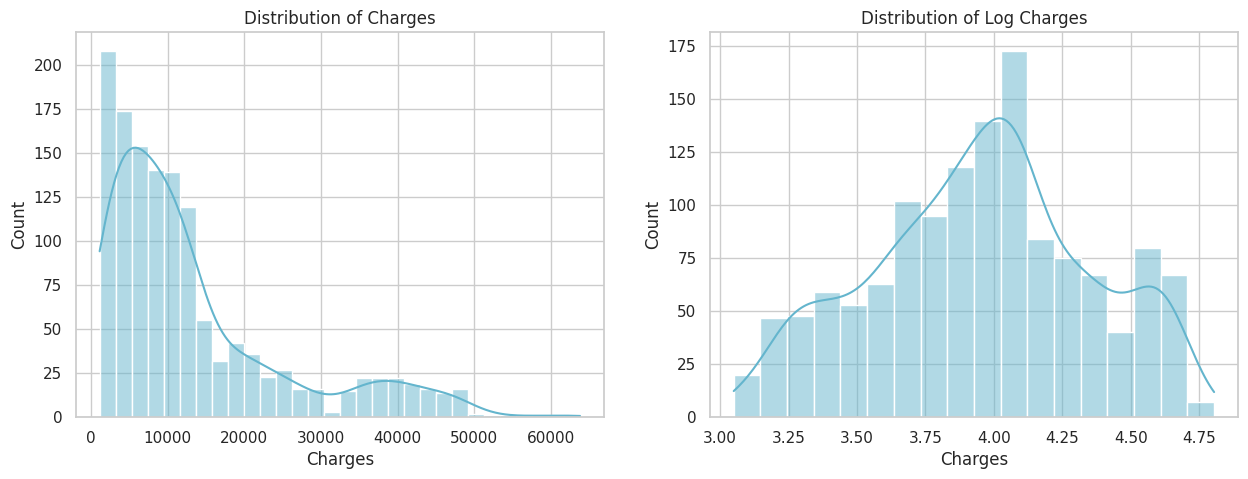

In [ ]:
# Charge distribution
sns.set(style='whitegrid')

f= plt.figure(figsize=(15,5))

ax = f.add_subplot(121)
sns.histplot(df['charges'], kde=True, color='c', ax=ax)
plt.title('Distribution of Charges')
plt.xlabel('Charges')

ax = f.add_subplot(122)
sns.histplot(np.log10(df['charges']), kde=True, color='c', ax=ax)
plt.title('Distribution of Log Charges')
plt.xlabel('Charges')

In [ ]:
# Encode categorical features
df_original = df.copy()

label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)

label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)

label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)

df.dtypes

,0
age,int64
sex,int64
bmi,float64
children,int64
smoker,int64
region,int64
charges,float64


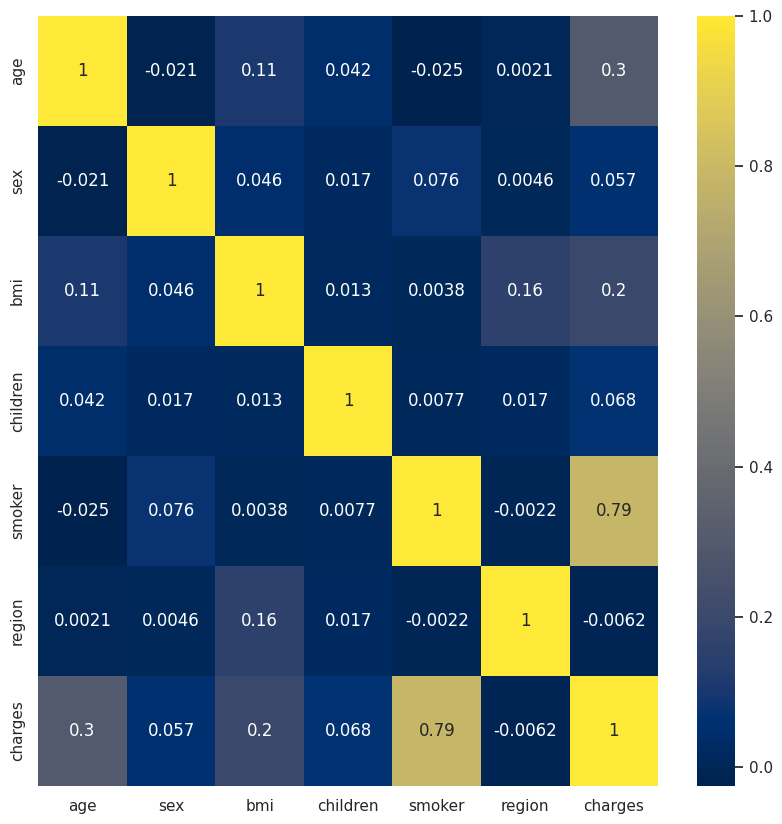

In [ ]:
# Correlation heatmap
f, ax = plt.subplots(1, 1, figsize=(10,10))
ax = sns.heatmap(df.corr(), annot=True, cmap='cividis')

As indicated in the heatmap, smoker has the greatest correlation with charges.

Text(0.5, 0, 'Charges')

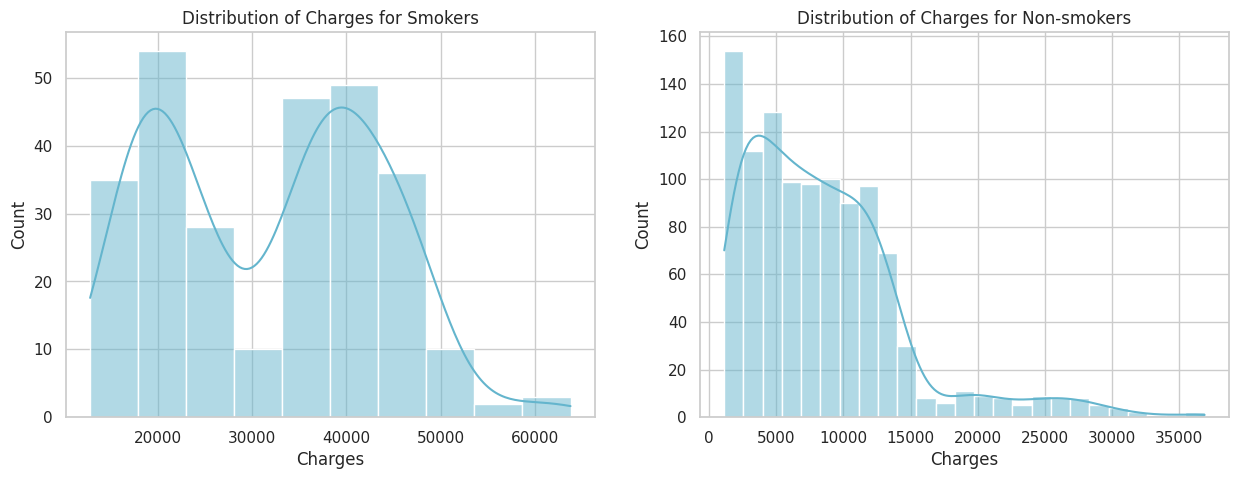

In [ ]:
# Plot distribution of chargers for smokers and non-smokers
f= plt.figure(figsize=(15,5))

ax = f.add_subplot(121)
sns.histplot(df[df.smoker == 1]['charges'], kde=True, color='c', ax=ax)
ax.set_title('Distribution of Charges for Smokers')
plt.xlabel('Charges')

ax=f.add_subplot(122)
sns.histplot(df[df.smoker == 0]['charges'], kde=True, color='c', ax=ax)
ax.set_title('Distribution of Charges for Non-smokers')
plt.xlabel('Charges')

Text(0, 0.5, 'Charges')

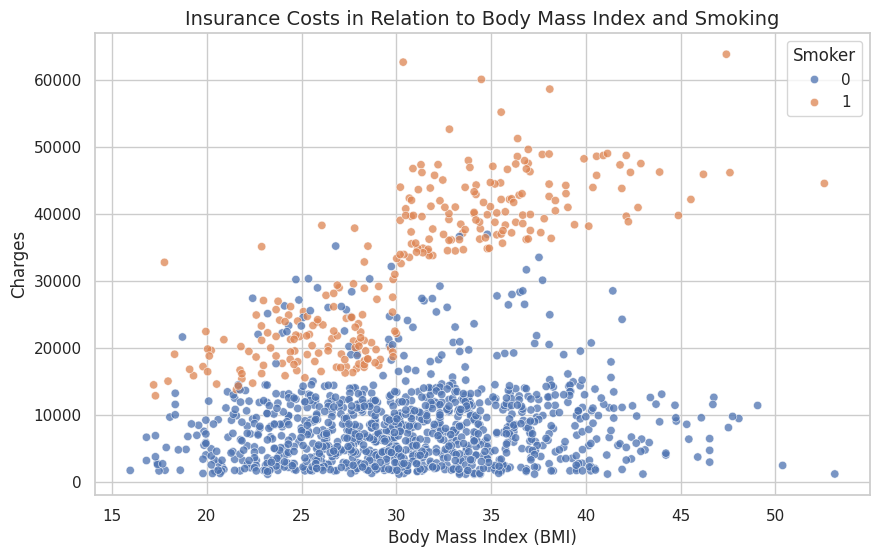

In [ ]:
# Plot insurance costs in relation to bmi
plt.figure(figsize=(10,6))

ax = sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, alpha=0.75)

plt.legend(title='Smoker', loc='upper right')

plt.title('Insurance Costs in Relation to Body Mass Index and Smoking', fontsize=14)
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Charges')

Insurance costs for smokers increase more significantly compared to non-smokers.

In [ ]:
# Effect of smoking on charges in different age groups
df_grouped = df.copy()
df_grouped['Age_Group'] = ['18-29' if i < 30 else '30-44' if (i >= 30) & (i < 45) else
                        '45-59' if (i >= 45) & (i < 60) else '60 and over' for i in df['age']]

df_grouped = df_grouped.groupby(['Age_Group', 'smoker'])['charges'].mean().reset_index().sort_values('smoker', ascending=True)

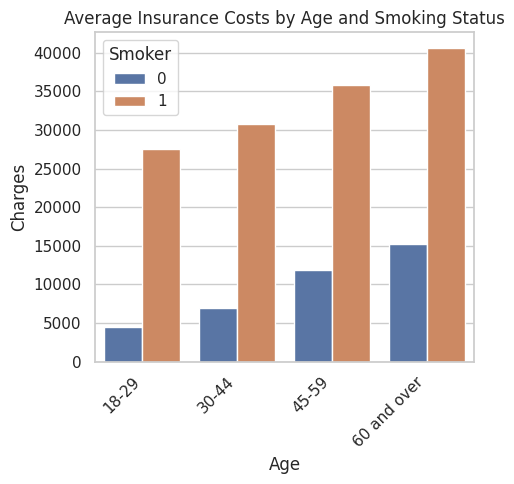

In [ ]:
plt.figure(figsize=(5,5))

sns.barplot(x='Age_Group', y='charges', hue='smoker', data=df_grouped, errorbar=None, dodge=True)

plt.legend(title='Smoker', loc='upper left')
plt.title('Average Insurance Costs by Age and Smoking Status')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Insurance costs for smokers are higher than non-smokers within each age group.

### Linear Regression

In [ ]:
X = df.drop(['charges'], axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lr = LinearRegression().fit(X_train_scaled, y_train)

y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

In [ ]:
print(f'Linear Regression R²: {r2_score(y_test, y_test_pred)}')
print(f'Linear Regression MSE: {mean_squared_error(y_test, y_test_pred)}')

Linear Regression R²: 0.7668905583460908
Linear Regression MSE: 35174149.32705307


### Random Forest Regression

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

rf_pred = rf.predict(X_test_scaled)

In [ ]:
print(f'Random Forest R²: {r2_score(y_test, rf_pred)}')
print(f'Random Forest MSE: {mean_squared_error(y_test, rf_pred)}')

Random Forest R²: 0.8456549780274321
Random Forest MSE: 23289296.27316685


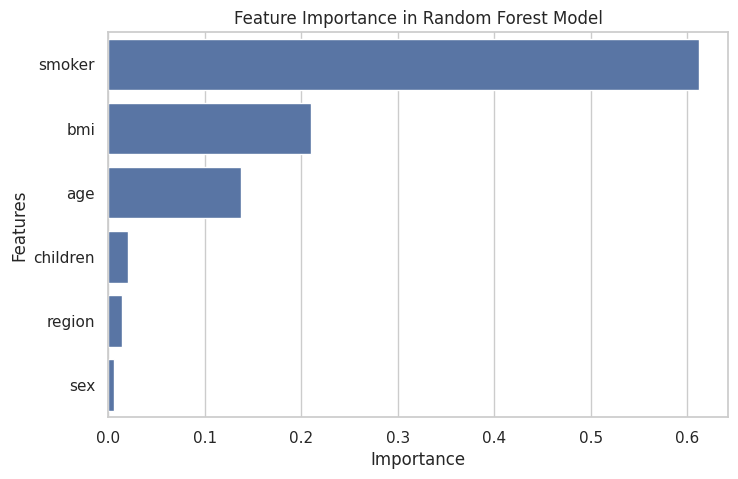

In [ ]:
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

### Summary
1. Smoking is the most significant factor affecting insurance costs.
- Smokers have substantially higher insurance costs than non-smokers.
- The correlation heatmap confirms that smoking has the strongest correlation with charges.
- Distribution plots show that even when controlling for other factors (e.g., age, BMI), smokers consistently pay more than non-smokers.

2. Random Forest Regressor outperformed Linear Regression.
- Random Forest R² was higher, indicating it captures non-linear patterns better.

3. Age and BMI are additional key factors.
- Age: Insurance costs increase with age, but at a decreasing rate.
- BMI: Higher BMI is associated with increased costs, particularly for smokers.

4. The effects of gender, number of children, and region are minimal.